In [1]:
# Data from - https://www.clips.uantwerpen.be/conll2000/chunking/

In [3]:
def prepare_data(file_path):
    sentences = []
    tags = []
    with open(file_path, "r") as f:
        sentence = []
        pos_tags = []
        for line in f:
            line = line.strip()
            if line == "":  # Sentence boundary
                if sentence:
                    sentences.append(sentence)
                    tags.append(pos_tags)
                    sentence = []
                    pos_tags = []
            else:
                parts = line.split()
                if len(parts) >= 2:  # Ensure the line has at least word and POS tag
                    word, pos_tag = parts[0], parts[1]
                    sentence.append(word)
                    pos_tags.append(pos_tag)
        if sentence:
            sentences.append(sentence)
            tags.append(pos_tags)
    return sentences, tags

# Usage
file_path = "../practical/data/train.txt"
sentences, pos_tags = prepare_data(file_path)


In [4]:
print(sentences[0])

['Confidence', 'in', 'the', 'pound', 'is', 'widely', 'expected', 'to', 'take', 'another', 'sharp', 'dive', 'if', 'trade', 'figures', 'for', 'September', ',', 'due', 'for', 'release', 'tomorrow', ',', 'fail', 'to', 'show', 'a', 'substantial', 'improvement', 'from', 'July', 'and', 'August', "'s", 'near-record', 'deficits', '.']


In [5]:
print(pos_tags[0])

['NN', 'IN', 'DT', 'NN', 'VBZ', 'RB', 'VBN', 'TO', 'VB', 'DT', 'JJ', 'NN', 'IN', 'NN', 'NNS', 'IN', 'NNP', ',', 'JJ', 'IN', 'NN', 'NN', ',', 'VB', 'TO', 'VB', 'DT', 'JJ', 'NN', 'IN', 'NNP', 'CC', 'NNP', 'POS', 'JJ', 'NNS', '.']


In [6]:
len(sentences)

8936

In [7]:
word_vocab = {word: idx for idx, word in enumerate(set(w for s in sentences for w in s), start=1)}
word_vocab["<PAD>"] = 0  # For padding
word_vocab["<UNK>"] = len(word_vocab)  # For unknown words

tag_vocab = {tag: idx for idx, tag in enumerate(set(t for ts in pos_tags for t in ts))}

In [8]:
idx2tag = {tag_vocab[tag] : tag for tag in tag_vocab.keys()}

In [9]:
idx2tag

{0: 'RB',
 1: 'EX',
 2: 'NN',
 3: 'VBN',
 4: 'POS',
 5: 'VB',
 6: 'CD',
 7: 'VBZ',
 8: 'WDT',
 9: '$',
 10: 'VBG',
 11: 'RBR',
 12: 'SYM',
 13: 'MD',
 14: 'FW',
 15: '.',
 16: 'CC',
 17: ')',
 18: 'PRP',
 19: 'WP',
 20: 'RBS',
 21: 'WRB',
 22: 'UH',
 23: 'NNP',
 24: ':',
 25: 'JJR',
 26: 'WP$',
 27: ',',
 28: '``',
 29: '#',
 30: 'NNPS',
 31: 'TO',
 32: 'RP',
 33: 'NNS',
 34: 'VBD',
 35: 'VBP',
 36: 'JJS',
 37: 'PDT',
 38: 'PRP$',
 39: 'JJ',
 40: '(',
 41: 'IN',
 42: 'DT',
 43: "''"}

In [10]:
len(word_vocab)

19124

In [11]:
len(tag_vocab)

44

In [12]:
tag_vocab

{'RB': 0,
 'EX': 1,
 'NN': 2,
 'VBN': 3,
 'POS': 4,
 'VB': 5,
 'CD': 6,
 'VBZ': 7,
 'WDT': 8,
 '$': 9,
 'VBG': 10,
 'RBR': 11,
 'SYM': 12,
 'MD': 13,
 'FW': 14,
 '.': 15,
 'CC': 16,
 ')': 17,
 'PRP': 18,
 'WP': 19,
 'RBS': 20,
 'WRB': 21,
 'UH': 22,
 'NNP': 23,
 ':': 24,
 'JJR': 25,
 'WP$': 26,
 ',': 27,
 '``': 28,
 '#': 29,
 'NNPS': 30,
 'TO': 31,
 'RP': 32,
 'NNS': 33,
 'VBD': 34,
 'VBP': 35,
 'JJS': 36,
 'PDT': 37,
 'PRP$': 38,
 'JJ': 39,
 '(': 40,
 'IN': 41,
 'DT': 42,
 "''": 43}

In [50]:
def encode_data(sentences, tags, word_vocab, tag_vocab):
    encoded_sentences = [[word_vocab.get(w, word_vocab["<UNK>"]) for w in s] for s in sentences]
    encoded_tags = [[tag_vocab[t] for t in ts] for ts in tags]
    return encoded_sentences, encoded_tags

X, y = encode_data(sentences, pos_tags, word_vocab, tag_vocab)

In [51]:
test_file_path = "../practical/data/test.txt"
t_sentences, t_pos_tags = prepare_data(test_file_path)
X_test, y_test = encode_data(t_sentences,t_pos_tags,word_vocab,tag_vocab)

In [52]:
len(X)

8936

In [53]:
from torch.nn.utils.rnn import pad_sequence
import torch

def pad_sequences(data, pad_value):
    return pad_sequence([torch.tensor(seq) for seq in data], batch_first=True, padding_value=pad_value)
# whats batch_first?
X_padded = pad_sequences(X, word_vocab["<PAD>"])
y_padded = pad_sequences(y, -1)  # Use -1 as the padding value for loss functions

In [54]:
X_padded.shape  == y_padded.shape

True

In [55]:
X_test_p = pad_sequences(X_test,word_vocab["<PAD>"])
y_test_p = pad_sequences(y_test,-1)

In [56]:
X_padded.shape

torch.Size([8936, 78])

In [57]:
y_padded.shape[0]

8936

In [58]:
X_padded[0]

tensor([ 8056, 15157,  8508, 16291,  9984,  7841, 10589, 10146, 14019, 11929,
         7116,   482, 11078, 12282,  9875,   219, 16064, 10973, 14684,   219,
         1078,  1322, 10973,  2405, 10146,  6588,  3218, 16549,  3712,  2685,
         8835, 18353,   588,  2192, 11518,  4111, 14131,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [59]:
y_padded[0]

tensor([ 2, 41, 42,  2,  7,  0,  3, 31,  5, 42, 39,  2, 41,  2, 33, 41, 23, 27,
        39, 41,  2,  2, 27,  5, 31,  5, 42, 39,  2, 41, 23, 16, 23,  4, 39, 33,
        15, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1])

In [60]:
from torch.utils.data import DataLoader, Dataset

In [61]:
class NERData(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, index):
        return self.X[index],self.y[index]
        

In [62]:
traindata = NERData(X_padded,y_padded)
testdata = NERData(X_test_p,y_test_p)

In [63]:
len(traindata),len(testdata)

(8936, 2012)

In [64]:
train_loader = DataLoader(traindata,batch_size = 32, shuffle= True)
test_loader = DataLoader(testdata,batch_size=32)

In [65]:
import torch.nn as nn

In [28]:
from gensim.models import KeyedVectors

# Load the pre-trained Word2Vec model (binary format)
word2vec = KeyedVectors.load_word2vec_format("/home/satya-tt0492/Downloads/archive(2)/GoogleNews-vectors-negative300.bin", binary=True)

# Vocabulary size and embedding dimension
embedding_dim = word2vec.vector_size
print(f"Embedding Dimension: {embedding_dim}")

Embedding Dimension: 300


In [66]:
import numpy as np
embedding_matrix = []
for word in word_vocab.keys():
    if word in word2vec:
        embedding_matrix.append(word2vec[word])  # Pre-trained vector
    else:
        embedding_matrix.append(np.random.normal(size=(embedding_dim,)))  # Random for unknown words

embedding_matrix = np.array(embedding_matrix)
embedding_matrix_tensor = torch.tensor(embedding_matrix, dtype=torch.float32)

In [90]:
class NERModel(nn.Module):
    def __init__(self, vocab_size, tagset_size, embedding_dim=300, hidden_dim=128):
        super(NERModel, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix_tensor, freeze=False)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)  # Single-direction LSTM
        # self.relu = nn.ReLU()
        self.fc = nn.Linear(hidden_dim, tagset_size)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Word embeddings
        lstm_out,_ = self.lstm(x)  # LSTM output
        # lstm_out = self.relu(lstm_out)
        logits = self.fc(lstm_out)  # Fully connected layer for tag predictions
        return logits

In [98]:
model = NERModel(vocab_size=len(word_vocab),tagset_size=len(tag_vocab))
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
criterion = nn.CrossEntropyLoss(ignore_index=-1)
losses = []

In [99]:
for epoch in range(30):
    model.train()
    total_loss = 0
    for x,y in train_loader:
        optimizer.zero_grad()
        outputs = model(x)
        outputs = outputs.view(-1,outputs.shape[-1]) # what does this do
        y = y.view(-1)

        loss = criterion(outputs,y)
        loss.backward()

        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss)
    print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 145.2768
Epoch 2, Loss: 13.3059
Epoch 3, Loss: 8.4920
Epoch 4, Loss: 6.1331
Epoch 5, Loss: 4.5398
Epoch 6, Loss: 3.3938
Epoch 7, Loss: 2.5607
Epoch 8, Loss: 1.9510
Epoch 9, Loss: 1.5430
Epoch 10, Loss: 1.2675
Epoch 11, Loss: 1.0657
Epoch 12, Loss: 0.9405
Epoch 13, Loss: 0.8380
Epoch 14, Loss: 0.7311
Epoch 15, Loss: 0.6945
Epoch 16, Loss: 0.6544
Epoch 17, Loss: 0.6233
Epoch 18, Loss: 0.6115
Epoch 19, Loss: 1.0472
Epoch 20, Loss: 1.1636
Epoch 21, Loss: 0.7561
Epoch 22, Loss: 0.5880
Epoch 23, Loss: 0.5314
Epoch 24, Loss: 0.5049
Epoch 25, Loss: 0.5084
Epoch 26, Loss: 0.4969
Epoch 27, Loss: 0.4945
Epoch 28, Loss: 0.4860
Epoch 29, Loss: 0.4702
Epoch 30, Loss: 0.4788


In [101]:
import matplotlib.pyplot as plt

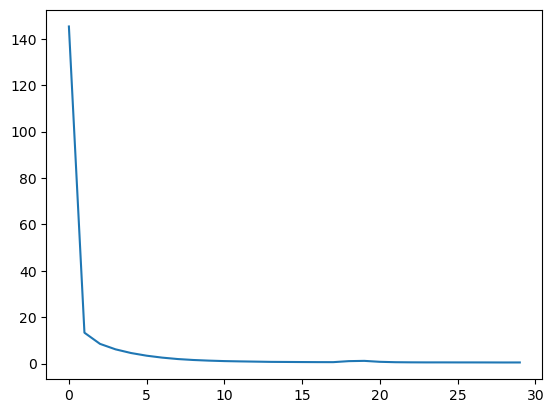

In [102]:
plt.plot(losses)

In [103]:
from sklearn.metrics import classification_report

In [104]:
model.eval()
all_preds, all_labels = [],[]
with torch.no_grad():
    for x,y in test_loader:
        outputs = model(x)
        preds = torch.argmax(outputs,dim = -1)
        # print(preds.shape,y.shape)
        all_preds.extend(preds.view(-1).tolist())
        all_labels.extend(y.view(-1).tolist())
p = len(all_labels)
q = len(all_preds)
p,q

(140840, 140840)

In [105]:
valid_indices = [i for i, label in enumerate(all_labels) if label != -1]
filtered_labels = [all_labels[i] for i in valid_indices]
filtered_preds = [all_preds[i] for i in valid_indices]

print(f"Filtered labels length: {len(filtered_labels)}")
print(f"Filtered preds length: {len(filtered_preds)}")

Filtered labels length: 47377
Filtered preds length: 47377


In [106]:
print(classification_report(filtered_labels,filtered_preds))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1354
           1       1.00      0.98      0.99        48
           2       0.92      0.92      0.92      6642
           3       0.57      0.91      0.70      1104
           4       1.00      1.00      1.00       434
           5       0.93      0.95      0.94      1269
           6       1.00      0.84      0.91      1918
           7       0.95      0.90      0.93       913
           8       0.79      0.78      0.78       202
           9       1.00      1.00      1.00       384
          10       0.90      0.84      0.87       728
          11       0.63      0.66      0.64        71
          13       1.00      0.99      1.00       470
          14       1.00      0.75      0.86         4
          15       1.00      1.00      1.00      1975
          16       1.00      1.00      1.00      1214
          17       1.00      1.00      1.00        77
          18       1.00    

In [107]:
sent = "The quick brown fox jumps over the lazy dog"
sent = sent.split()
inp = torch.tensor([word_vocab.get(word,word_vocab["<UNK>"]) for word in sent])
outputs = model(inp)

In [108]:
output = torch.argmax(outputs,dim=-1).view(-1)

In [109]:
output = output.tolist()
tags = [idx2tag[idx] for idx in output]

In [110]:
tags

['DT', 'JJ', 'NNS', 'NN', 'VBN', 'IN', 'DT', 'JJ', 'NN']